# TMDB_5000 analysis

link : https://www.kaggle.com/tmdb/tmdb-movie-metadata.

#   Importing and investigating 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

columns to drop :
homepage , id , overview , spoken_languages , tagline, original_title
as they wont much value in our analysis


In [4]:
movies.drop(['homepage' , 'id' , 'overview' ,'spoken_languages' ,'tagline', 'original_title'], axis =1 , inplace =True)

### we will drop some extra columns :

keywords,production_companies,production_countries,status,movie_id, cast,crew

no the counrty is valuable

In [5]:
movies.drop(['keywords','production_companies','status'], axis=1 , inplace = True)

In [6]:
movies.head(1)

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800


# Questions 
1) what genre has more vote average
2) what genre has more vote count
3) what genre is more popular
4) assosiation with genre and budget
5) assosiation with genre and revenue 
6) assosiation with time and revenue
7) assosiation with time and vote average
8) how this genre evolved with years 

generally the sweat spot(genre) for a production company to acheive high profit, liked movie

# Data cleaning

In [7]:
# check the null values
movies.isnull().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

the data seams very clean so droping those few row wont affect our analysis

In [8]:
# check duplicated rows
movies.duplicated().sum()

0

In [9]:
# drop them
movies.dropna(inplace=True)

In [10]:
movies.duplicated().sum()

0

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4800 non-null   int64  
 1   genres                4800 non-null   object 
 2   original_language     4800 non-null   object 
 3   popularity            4800 non-null   float64
 4   production_countries  4800 non-null   object 
 5   release_date          4800 non-null   object 
 6   revenue               4800 non-null   int64  
 7   runtime               4800 non-null   float64
 8   title                 4800 non-null   object 
 9   vote_average          4800 non-null   float64
 10  vote_count            4800 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 450.0+ KB


In [12]:
movies

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,0.642552,[],2011-12-26,0,85.0,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6
4801,0,[],en,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Shanghai Calling,5.7,7


In [13]:
# date is not in date format
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = movies['release_date'].dt.year

In [14]:
# removing zero values in revenue and budgets

colmns = ['budget','revenue']
movies[colmns] = movies[colmns].replace(0,np.nan)

movies.dropna(subset=colmns, inplace=True)
movies.shape

(3229, 12)

In [15]:
movies.dropna(subset=['genres'], how = 'any', inplace=True )

In [16]:
movies.shape

(3229, 12)

## genres data is not very readable so we will clean it a bit

In [17]:
def parse_col_json(column,key):

    for index,i in zip(movies.index,movies[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
        movies.loc[index,column]=str(list1)

In [18]:
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')

movies.head()

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",en,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",en,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,"['Action', 'Adventure', 'Crime']",en,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",en,112.312950,['United States of America'],2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",en,43.926995,['United States of America'],2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012


In [19]:
movies.genres[0]

"['Action', 'Adventure', 'Fantasy', 'Science Fiction']"

In [20]:
# movies['genres'] = [ l.split('\'')[1] for l in movies['genres']]
" will make an error ,need to be fixed manually"

' will make an error ,need to be fixed manually'

we will do it the hard way cause i couldn't do it in code😢

In [21]:
movies.to_csv('mov.csv')

In [22]:
movies = movies.drop(3032)
movies = movies.drop(3033)
movies = movies.drop(4105)
movies = movies.drop(4106)

In [23]:
movies['genres'] = [ l.split('\'')[1] for l in movies['genres']]

In [24]:
movies

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year
0,237000000.0,Action,en,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009
1,300000000.0,Adventure,en,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,Action,en,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015
3,250000000.0,Action,en,112.312950,['United States of America'],2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012
4,260000000.0,Action,en,43.926995,['United States of America'],2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000.0,Comedy,en,19.748658,['United States of America'],1994-09-13,3.151130e+06,92.0,Clerks,7.4,755,1994
4788,12000.0,Horror,en,4.553644,['United States of America'],1972-03-12,6.000000e+06,93.0,Pink Flamingos,6.2,110,1972
4792,20000.0,Crime,ja,0.212443,['Japan'],1997-11-06,9.900000e+04,111.0,Cure,7.4,63,1997
4796,7000.0,Science Fiction,en,23.307949,['United States of America'],2004-10-08,4.247600e+05,77.0,Primer,6.9,658,2004


In [25]:
# movies['production_countries'] = [l.split('\'')[1] for l in movies['production_countries']]
" will make an error ,need to be fixed manually"

' will make an error ,need to be fixed manually'

In [26]:
movies.to_csv('mov.csv')

In [27]:
movies= movies.drop([4668,4524,4375,4272,3419,3388,3319,3243,3225,2899,2728,1983,1932,272])
movies['production_countries'] = [l.split('\'')[1] for l in movies['production_countries']]

In [28]:
movies = movies.set_index('title')

# Data visualization

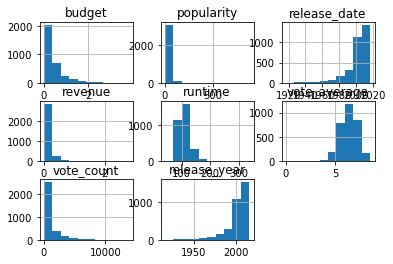

In [29]:
movies.hist();

In [30]:
movies['profit'] = movies.revenue - movies.budget

In [31]:
movies.head(3)

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,release_year,profit
title,,,,,,,,,,,,
Avatar,237000000.0,Action,en,150.437577,United States of America,2009-12-10,2.787965e+09,162.0,7.2,11800,2009,2.550965e+09
Pirates of the Caribbean: At World's End,300000000.0,Adventure,en,139.082615,United States of America,2007-05-19,9.610000e+08,169.0,6.9,4500,2007,6.610000e+08
Spectre,245000000.0,Action,en,107.376788,United Kingdom,2015-10-26,8.806746e+08,148.0,6.3,4466,2015,6.356746e+08


## 1) is money and vote_average have a corelation ?

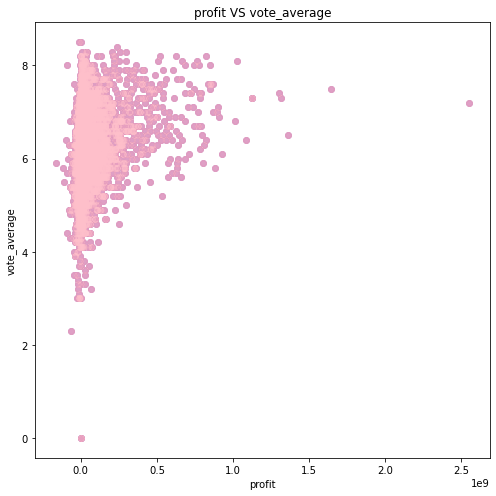

In [32]:
fig, ax = plt.subplots(figsize=(7,7))

plt.scatter(x=movies['profit'] ,y=movies['vote_average'] , color ='purple', alpha= 0.5)

scatter = ax.scatter(x=movies['profit'] ,y=movies['vote_average'], color ='pink', alpha= 0.5)
plt.title('profit VS vote_average')
plt.xlabel('profit')
plt.ylabel('vote_average')
plt.tight_layout()
plt.show()

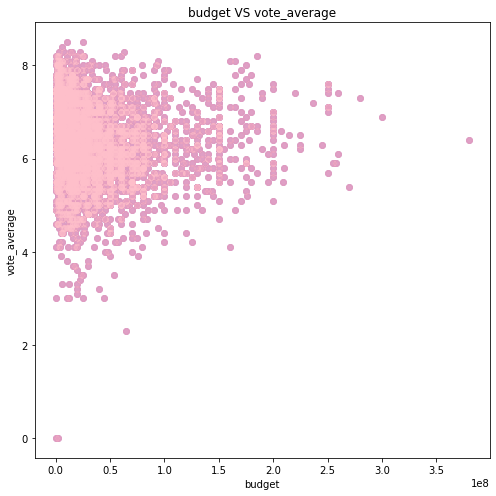

In [33]:
fig, ax = plt.subplots(figsize=(7,7))

plt.scatter(x=movies['budget'] ,y=movies['vote_average'] , color ='purple', alpha= 0.5)

scatter = ax.scatter(x=movies['budget'] ,y=movies['vote_average'], color ='pink', alpha= 0.5)
plt.title('budget VS vote_average')
plt.xlabel('budget')
plt.ylabel('vote_average')
plt.tight_layout()
plt.show()

not really 

In [34]:
movies[movies.budget == movies.budget.max()]

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,release_year,profit
title,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,380000000.0,Adventure,en,135.413856,United States of America,2011-05-14,1.045714e+09,136.0,6.4,4948,2011,665713802.0


In [35]:
movies[movies.vote_average == movies.vote_average.max()]

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,release_year,profit
title,,,,,,,,,,,,
The Shawshank Redemption,25000000.0,Drama,en,136.747729,United States of America,1994-09-23,28341469.0,142.0,8.5,8205,1994,3341469.0
There Goes My Baby,10500000.0,Drama,en,0.037073,United States of America,1994-09-02,123509.0,99.0,8.5,2,1994,-10376491.0


In [36]:
movies[movies.vote_average == movies.vote_average.max()].profit

title
The Shawshank Redemption     3341469.0
There Goes My Baby         -10376491.0
Name: profit, dtype: float64

shawshank is a good movie

the second movie most probably has bais as the profit is minus

## What genres are the most successful ?

In [37]:
movies.groupby('genres')['vote_average'].mean().sort_values()

genres
Horror             5.931980
Comedy             6.068839
Action             6.074017
Family             6.139474
Thriller           6.170339
Fantasy            6.247312
Mystery            6.325926
Science Fiction    6.339241
Adventure          6.387456
Romance            6.417143
Animation          6.432990
Music              6.555000
Crime              6.637589
Drama              6.664651
War                6.666667
History            6.788889
Documentary        6.825000
Foreign            6.900000
Western            7.061905
Name: vote_average, dtype: float64

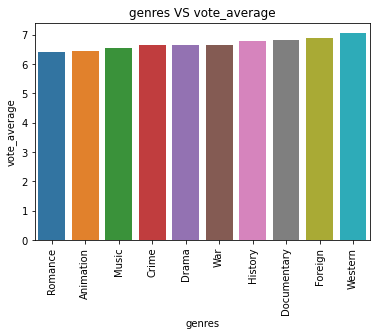

In [38]:
# top ten
result = movies.groupby('genres')['vote_average'].mean().sort_values()[-10:]
 
# plot the result
sns.barplot(x = result.index, y = result.values)
plt.xticks(rotation=90)
plt.title('genres VS vote_average')
plt.xlabel('genres')
plt.ylabel('vote_average')
plt.show()

### looks like  Science Fiction, Adventure, Romance, Animation ,Music ,Crime, Drama, War,History ,Documentary, Foreign ,Western have high average votes than the rest

In [39]:
movies.groupby('genres').count()['vote_average'].sort_values()

genres
Foreign              1
History             18
War                 18
Music               20
Western             21
Mystery             27
Documentary         28
Family              38
Romance             70
Science Fiction     79
Fantasy             93
Animation           97
Thriller           118
Crime              141
Horror             197
Adventure          287
Action             585
Comedy             629
Drama              744
Name: vote_average, dtype: int64

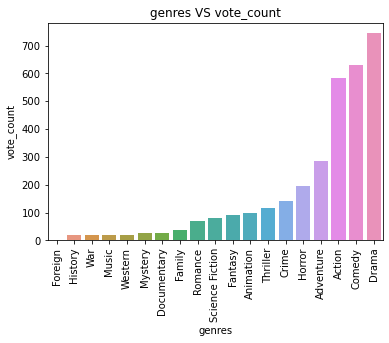

In [40]:
result = movies.groupby('genres').count()['vote_count'].sort_values()
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS vote_count')
plt.xlabel('genres')
plt.ylabel('vote_count')
plt.xticks(rotation=90);

### but people are more engaged in  Animation, Thriller, Crime, Horror, Adventure, Action, Comedy, Drama

recall from previous analysis Science Fiction, Adventure, Romance, Animation ,Music ,Crime, Drama, War,History ,Documentary, Foreign ,Western have high average votes than the rest

music, Romance, War,History ,Documentary, Foreign ,Western not many people engaged in 

so that leaves us with  Action, Comedy, Drama, Animation, Thriller, Crime,  Adventure

In [41]:
movies.groupby('genres').count()['vote_count'].sort_values()[-10:]

genres
Science Fiction     79
Fantasy             93
Animation           97
Thriller           118
Crime              141
Horror             197
Adventure          287
Action             585
Comedy             629
Drama              744
Name: vote_count, dtype: int64

In [42]:
movies.popularity.describe()

count    3211.000000
mean       29.186636
std        36.208790
min         0.019984
25%        10.634219
50%        20.566554
75%        37.471279
max       875.581305
Name: popularity, dtype: float64

<AxesSubplot:>

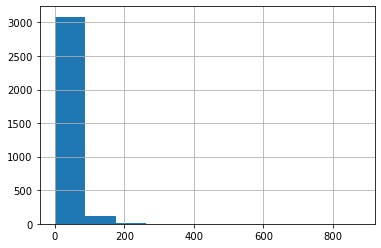

In [43]:
movies.popularity.hist()

right skewed so i decided to use medain instead of mean

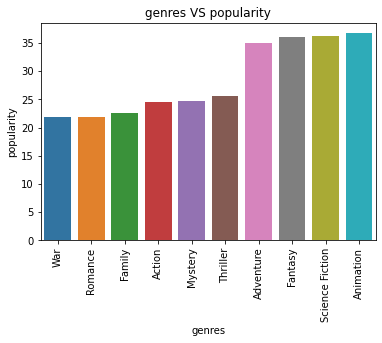

In [44]:
movies.groupby('genres').median()['popularity'].sort_values()
result = movies.groupby('genres').median()['popularity'].sort_values()[-10:]
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS popularity')
plt.xlabel('genres')
plt.ylabel('popularity')
plt.xticks(rotation=90);

In [45]:
movies.groupby('genres').median()['popularity'].sort_values()

genres
Foreign             0.126676
Documentary         6.029553
Music               9.953387
History            12.910512
Drama              16.473456
Comedy             16.901954
Western            19.068175
Crime              19.760383
Horror             21.680424
War                21.842840
Romance            21.874679
Family             22.608480
Action             24.459948
Mystery            24.664776
Thriller           25.545744
Adventure          35.061467
Fantasy            36.069611
Science Fiction    36.157160
Animation          36.711378
Name: popularity, dtype: float64

genres that are more popular with people : 
Drama,Comedy,Western,Crime,Horror,War,Romance,Family, Action ,Mystery ,Thriller, Adventure, Fantasy, Science Fiction ,Animation 

recall from previous analysis : Action, Comedy, Drama, Animation, Thriller, Crime,  Adventure

that leaves us with only Action, Drama, Animation, Thriller, Adventure

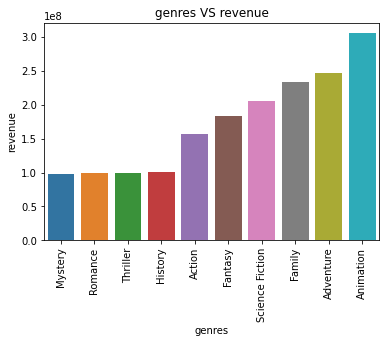

In [46]:
result = movies.groupby('genres')['revenue'].mean().sort_values()[-10:]
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS revenue')
plt.xlabel('genres')
plt.ylabel('revenue')
plt.xticks(rotation=90);

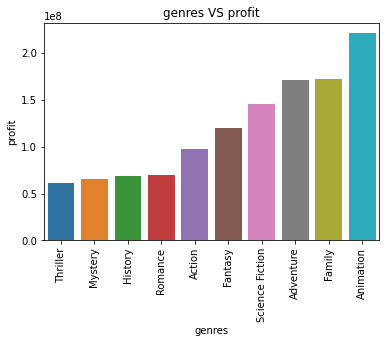

In [47]:
result = movies.groupby('genres')['profit'].mean().sort_values()[-10:]
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS profit')
plt.xlabel('genres')
plt.ylabel('profit')
plt.xticks(rotation=90);

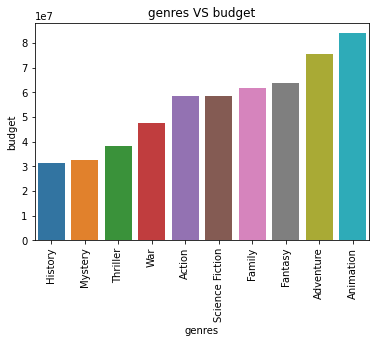

In [48]:
result = movies.groupby('genres')['budget'].mean().sort_values()[-10:]
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS budget')
plt.xlabel('genres')
plt.ylabel('budget')
plt.xticks(rotation=90);

In [49]:
movies['revenue_rate']= movies['revenue']/ movies['budget']

In [50]:
movies.groupby('genres')['revenue_rate'].mean().sort_values()

genres
Foreign                0.494667
War                    2.466309
Action                 2.886273
Crime                  3.277627
Family                 3.719557
Thriller               3.944354
Music                  4.013286
Romance                4.434567
Fantasy                4.703460
Comedy                 4.864544
Mystery                5.147608
Science Fiction        5.189238
Adventure              5.731265
History                7.073237
Animation              7.351940
Western                8.631808
Documentary          213.549734
Horror              5179.558528
Drama              11430.886817
Name: revenue_rate, dtype: float64

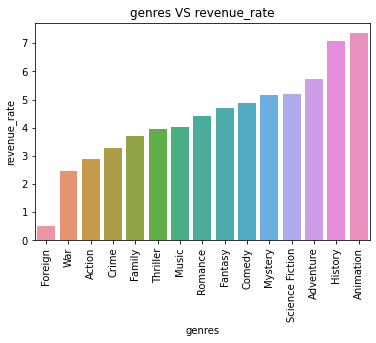

In [51]:
result = movies.groupby('genres')['revenue_rate'].mean().sort_values()[:15]
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS revenue_rate')
plt.xlabel('genres')
plt.ylabel('revenue_rate')
plt.xticks(rotation=90);

## low budget genres Action, Drama
## high revenue Drama,Action, Adventure, Animation

recall from previous analysis Action, Comedy, Drama, Animation, Thriller, Crime,  Adventure


drama has very low buget and low revenue compared to the others but it get people engaged

Action has a good mix between engagment and low budget and high revenue 

Adventure has a good mix between engagment but higher in both budget and revenue 

and that leaves us with Action and Adventure

# how the industy grows over the years ?

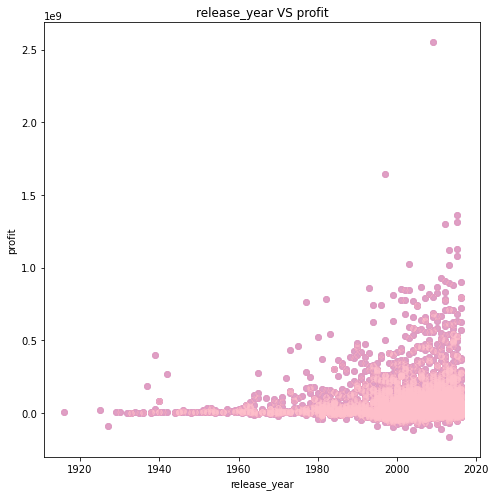

In [52]:
df_genres_year = movies.groupby(['release_year', 'genres']).count()
df_genres_year

fig, ax = plt.subplots(figsize=(7,7))

plt.scatter(x=movies['release_year'] ,y=movies['profit'] , color ='purple', alpha= 0.5)

scatter = ax.scatter(x=movies['release_year'] ,y=movies['profit'], color ='pink', alpha= 0.5)
plt.title('release_year VS profit')
plt.xlabel('release_year')
plt.ylabel('profit')
plt.tight_layout()
plt.show()

In [53]:
after_2010 = movies[movies.release_year > 2010]

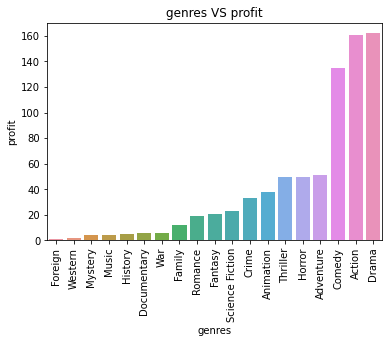

In [54]:
result = after_2010.groupby('genres')['profit'].count().sort_values()

# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS profit')
plt.xlabel('genres')
plt.ylabel('profit')
plt.xticks(rotation=90);

## Our candidates genres are: Action , Adventure 
### Action has lower budget and high profit and overall advantages
so we will choose Action movies

In [55]:
"""d = movies[movies.genres == 'Action']
dd= d.groupby(['release_year']).count()
val = dd['genres']
#dd.values[0]
val"""

"d = movies[movies.genres == 'Action']\ndd= d.groupby(['release_year']).count()\nval = dd['genres']\n#dd.values[0]\nval"

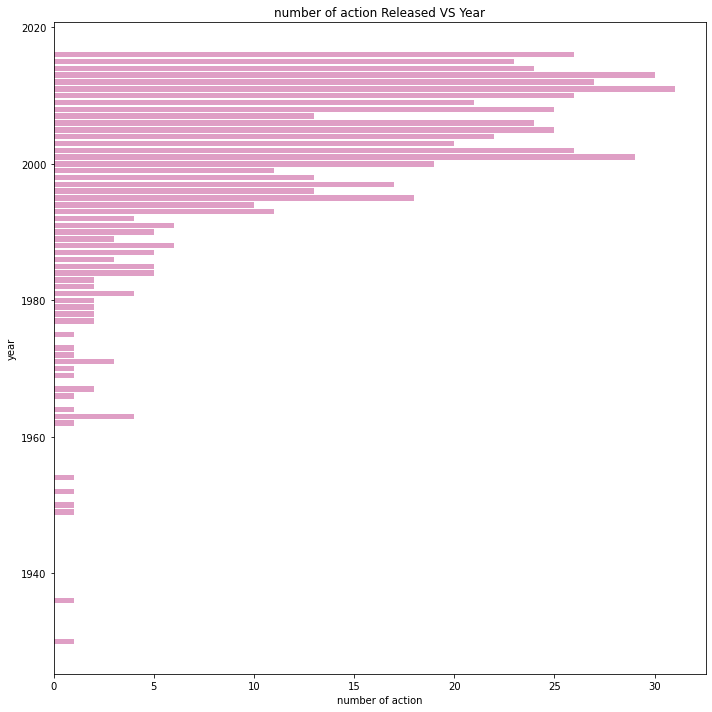

In [56]:
action = movies[movies.genres == 'Action']
action_by_year= action.groupby(['release_year']).count()
values = action_by_year['genres']

fig, ax = plt.subplots(figsize=(10,10))

plt.barh(action_by_year.index, values, color ='purple', alpha= 0.5)

barh = ax.barh(action_by_year.index, values, color ='pink', alpha= 0.5)
plt.title('number of action Released VS Year')
plt.xlabel('number of action')
plt.ylabel('year')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'number of action movies')

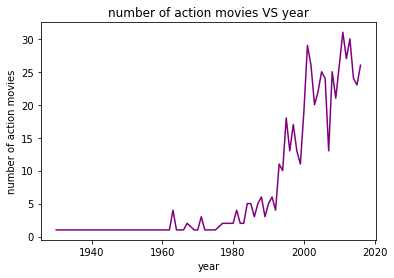

In [57]:
plt.plot(action_by_year[['genres']], color ='purple')
plt.title('number of action movies VS year')
plt.xlabel('year')
plt.ylabel('number of action movies')

# what language to choose ?

In [58]:
movies.original_language.value_counts()

en    3086
fr      25
es      15
ja      13
zh      12
de       9
hi       7
ru       6
it       6
cn       5
ko       5
da       4
id       2
nl       2
pt       2
th       2
xx       1
te       1
fa       1
ro       1
af       1
is       1
nb       1
he       1
no       1
pl       1
Name: original_language, dtype: int64

### english is dominating

## How long the movie should ?

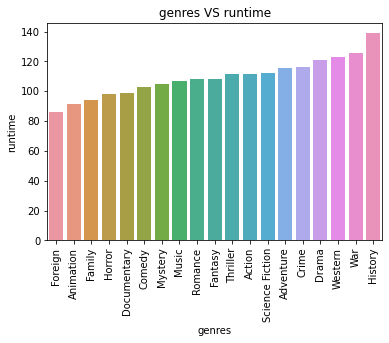

In [59]:
result = movies.groupby('genres').mean()['runtime'].sort_values()
 
# plot the result
sns.barplot(x = result.index, y = result.values);
plt.title('genres VS runtime')
plt.xlabel('genres')
plt.ylabel('runtime')
plt.xticks(rotation=90);

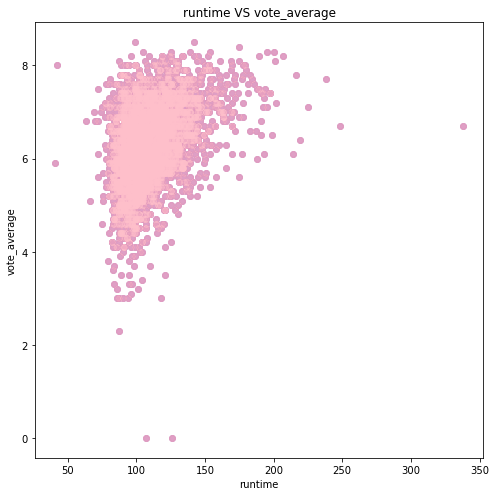

In [60]:
fig, ax = plt.subplots(figsize=(7,7))

plt.scatter(x=movies['runtime'] ,y=movies['vote_average'] , color ='purple', alpha= 0.5)

scatter = ax.scatter(x=movies['runtime'] ,y=movies['vote_average'], color ='pink', alpha= 0.5)
plt.title('runtime VS vote_average')
plt.xlabel('runtime')
plt.ylabel('vote_average')
plt.tight_layout()
plt.show()

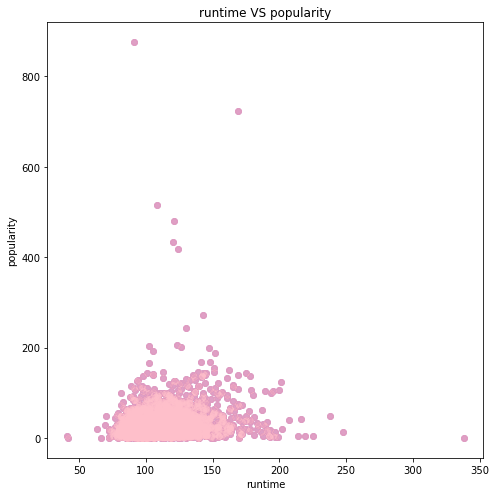

In [61]:
fig, ax = plt.subplots(figsize=(7,7))

plt.scatter(x=movies['runtime'] ,y=movies['popularity'] , color ='purple', alpha= 0.5)

scatter = ax.scatter(x=movies['runtime'] ,y=movies['popularity'], color ='pink', alpha= 0.5)
plt.title('runtime VS popularity')
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.tight_layout()
plt.show()

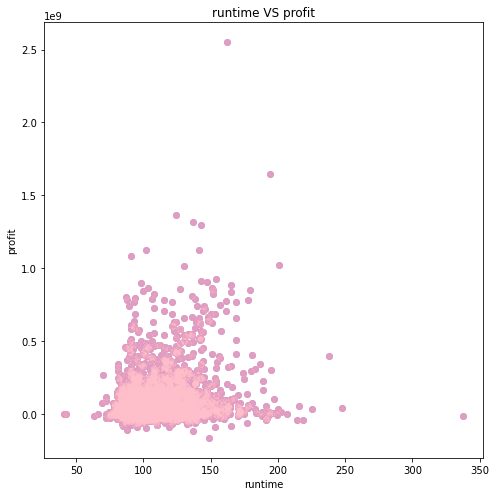

In [62]:
fig, ax = plt.subplots(figsize=(7,7))

plt.scatter(x=movies['runtime'] ,y=movies['profit'] , color ='purple', alpha= 0.5)

scatter = ax.scatter(x=movies['runtime'] ,y=movies['profit'], color ='pink', alpha= 0.5)
plt.title('runtime VS profit')
plt.xlabel('runtime')
plt.ylabel('profit')
plt.tight_layout()
plt.show()

#### runtime has no effect on anything

# Conclusion 

make an Action movie in English is more likely to get more fans as well as make a success

## 1) what genre has more vote average?
#### western but it got low vote count as data in this genre is insuffecient so Drama genre is the winner.
## 2) what genre has more vote count
#### Drama then Comedy then Action.
## 3) what genre is more popular
#### Animation genre is very popular.
## 4) assosiation with genre and budget
#### Animation, Adventure, Fantasy maybe they have high budget due to expensive computer graphics work done.
## 5) assosiation with genre and revenue 
#### Animation, Adventure, Family.
## 6) assosiation with time and revenue
#### not so clear maybe this a limitation in the data or they hust not corelated
## 7) assosiation with time and vote average
#### not so clear maybe this a limitation in the data or they hust not corelated.
## 8) how this genre evolved with years
#### Action movies trend is increasing highly every year.

generally the sweat spot(genre) for a production company to acheive high profit, liked movie


# Limitations
### * The dataset has bais in some movies 
### * High propotion of budget and revenue data are zeros which is impossible 
### * We ignored other factors that could effect a movie revenue like politcal matters, crisis, or peolpe just don't like the actors
### * We've taken only the first genre in a moive ignoring the fact that a movie can be in several genres 
### * Number of movies in every genre isn't like the other

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295